In [ ]:
!wget --no-check-certificate \
    https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip \
    -O ./cats_and_dogs_filtered.zip

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

2021-09-10 18:20:05.425749: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-10 18:20:05.425786: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
print(len(os.listdir('./PetImages/Cat/')))
print(len(os.listdir('./PetImages/Dog/'))) 

12501
12501


In [3]:
try:
    os.mkdir('./cats-v-dogs')
    os.mkdir('./cats-v-dogs/training')
    os.mkdir('./cats-v-dogs/testing')
    os.mkdir('./cats-v-dogs/training/cats')
    os.mkdir('./cats-v-dogs/training/dogs')
    os.mkdir('./cats-v-dogs/testing/cats')
    os.mkdir('./cats-v-dogs/testing/dogs')
except OSError:
    pass

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
 
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]
 
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
 
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
 
 
CAT_SOURCE_DIR = "./PetImages/Cat/"
TRAINING_CATS_DIR = "./cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "./cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "./PetImages/Dog/"
TRAINING_DOGS_DIR = "./cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "./cats-v-dogs/testing/dogs/"
 
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [4]:
print(len(os.listdir('./cats-v-dogs/training/cats/')))
print(len(os.listdir('./cats-v-dogs/training/dogs/')))
print(len(os.listdir('./cats-v-dogs/testing/cats/')))
print(len(os.listdir('./cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

2021-09-10 18:20:18.211414: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-10 18:20:18.211443: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-10 18:20:18.211463: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cesar-manjaro): /proc/driver/nvidia/version does not exist
2021-09-10 18:20:18.211726: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
TRAINING_DIR = "./cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
    batch_size=100,
    class_mode='binary',
    interpolation='lanczos',
    target_size=(150, 150))

VALIDATION_DIR = "./cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
    batch_size=100,
    class_mode='binary',
    interpolation='lanczos',
    target_size=(150, 150))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [11]:
# Note that this may take some time.
history = model.fit_generator(train_generator,
    epochs=8,
    verbose=1,
    validation_data=validation_generator)

/home/cesar/.local/share/virtualenvs/tensorflow-YMIb0kDI/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
191/225 [========================>.....] - ETA: 23s - loss: 0.0955 - accuracy: 0.9682

/home/cesar/.local/share/virtualenvs/tensorflow-YMIb0kDI/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:811: UserWarning: Truncated File Read
  warnings.warn(str(msg))


225/225 [==============================] - 166s 736ms/step - loss: 0.0939 - accuracy: 0.9685 - val_loss: 0.0286 - val_accuracy: 0.9932
Epoch 2/8
225/225 [==============================] - 166s 737ms/step - loss: 0.0311 - accuracy: 0.9923 - val_loss: 0.0081 - val_accuracy: 0.9988
Epoch 3/8
225/225 [==============================] - 166s 736ms/step - loss: 0.0120 - accuracy: 0.9968 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 4/8
225/225 [==============================] - 166s 737ms/step - loss: 0.0056 - accuracy: 0.9997 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 5/8
225/225 [==============================] - 166s 735ms/step - loss: 0.0086 - accuracy: 0.9995 - val_loss: 8.8679e-04 - val_accuracy: 1.0000
Epoch 6/8
225/225 [==============================] - 166s 737ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 5.8788e-04 - val_accuracy: 1.0000
Epoch 7/8
225/225 [==============================] - 166s 738ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 3.8594e-04 - val_

<Figure size 432x288 with 0 Axes>

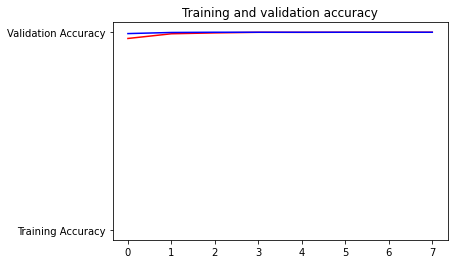

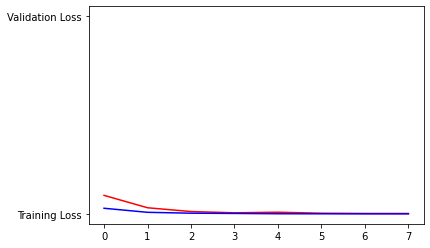

<Figure size 432x288 with 0 Axes>

In [12]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs
 
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
 
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

[0.9974333]
E-2GtW8UYAQN1TR is a dog


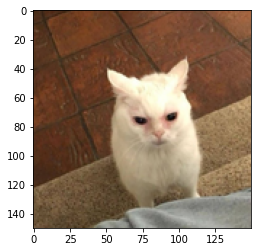

[0.906903]
riddle is a dog


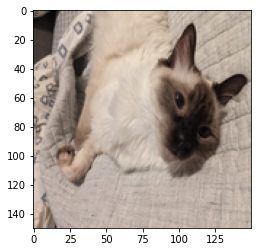

[0.01049855]
riddle is a cat


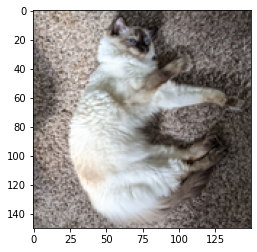

In [13]:
from keras.preprocessing import image
import numpy as np
import os

# predicting images
for filename in os.listdir("./catdogpred/"):
    fn = filename
    path = './catdogpred/' + fn
    if os.path.isdir(path):
        continue
    name = fn.split('.')[0]
    img = image.load_img(path, target_size=(150, 150), interpolation="lanczos")
    x = image.img_to_array(img)
    x = x / 255
    x = np.expand_dims(x, axis=0)

    # images = np.vstack([x])
    # classes = model.predict(images, batch_size=10)
    classes = model.predict(x, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(name + " is a dog")
    else:
        print(name + " is a cat")

    plt.imshow(img)
    
    plt.show()

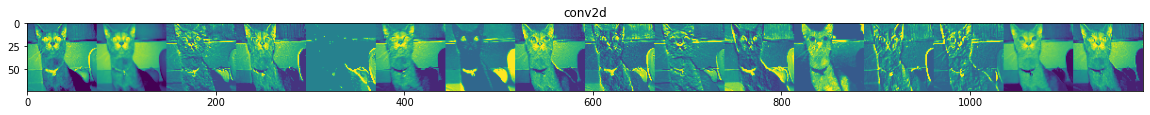

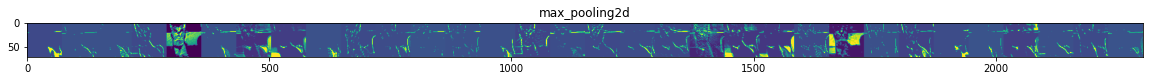

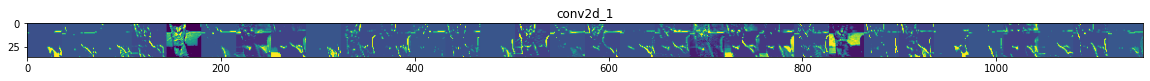

In [10]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
 
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
train_cat_names = os.listdir("./cats-v-dogs/training/cats/")
train_dog_names = os.listdir("./cats-v-dogs/training/dogs/")
horse_img_files = [os.path.join("./cats-v-dogs/training/cats/", f) for f in train_cat_names]
human_img_files = [os.path.join("./cats-v-dogs/training/dogs/", f) for f in train_dog_names]
img_path = random.choice(horse_img_files + human_img_files)
 
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
 
# Rescale by 1/255
x /= 255
 
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
 
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
 
# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.std()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')